# Ejercicio 1

Definimos las variables aleatorias $T_{i}$ : " Tiempo en segundos que transcurre entre la $i-ésima$ y la $ i+1-ésima$ llamada al servicio " y generamos muestras aleatorias para las mismas.

$T_{i} \sim \varepsilon(\frac{1}{4}) $

In [69]:
import numpy as np
from numpy.random import RandomState

In [70]:
cantidad_solicitudes = 100000
tiempos_entre_llamadas = RandomState(5).exponential(scale=4, size=cantidad_solicitudes)

# tiempos_acumulados almacena el instante en el que llega cada solicitud
tiempos_acumulados = []
tiempos_acumulados.append(tiempos_entre_llamadas[0])
for i in range(cantidad_solicitudes - 1):
    tiempos_acumulados.append(tiempos_acumulados[i] + tiempos_entre_llamadas[i+1])

## Arquitectura con dos bases de datos 

Dado que cada solicitud es procesada por una base de datos u otra de acuerdo a una distribución Bernoulli con parámetro $p = 0.6$ independientemente de las demás solicitudes, podemos aplicar la propiedad de adelgazamiento para Procesos de Poisson. En este sentido, analizamos cada base de datos por separado. 

In [71]:
def calcular_tiempos_espera(horarios_llegada, demora, cantidad_solicitudes):
    horario_base_liberada = horarios_llegada[0] + demora[0]
    tiempo_espera = []

    #la primera solicitud no debe esperar
    tiempo_espera.append(0)
    for i in range(cantidad_solicitudes - 1):
        if horarios_llegada[i+1] < horario_base_liberada:
            tiempo_espera.append(horario_base_liberada - horarios_llegada[i+1])
            horario_base_liberada += demora[i+1] 

        else:
            tiempo_espera.append(0)
            horario_base_liberada = horarios_llegada[i+1] + demora[i+1] 
    
    return tiempo_espera            

In [72]:
p = 0.6
eleccion = np.asarray(RandomState(5).binomial(1, p, cantidad_solicitudes))
tiempos_llegada_b1 = []
tiempos_llegada_b2 = []

for i in range(cantidad_solicitudes):
    if eleccion[i] == 1:
        tiempos_llegada_b1.append(tiempos_acumulados[i])
    else:
        tiempos_llegada_b2.append(tiempos_acumulados[i])
        
cantidad_solicitudes_b1 = len(tiempos_llegada_b1)
cantidad_solicitudes_b2 = len(tiempos_llegada_b2)
demora_b1 = RandomState(5).exponential(scale=0.7, size=cantidad_solicitudes_b1)
demora_b2 = RandomState(5).exponential(scale=1, size=cantidad_solicitudes_b2)

tiempos_espera_b1 = calcular_tiempos_espera(tiempos_llegada_b1, demora_b1, cantidad_solicitudes_b1)        
tiempos_espera_b2 = calcular_tiempos_espera(tiempos_llegada_b2, demora_b2, cantidad_solicitudes_b2)

In [73]:
print("El tiempo medio de espera para la primera arquitectura es de {:.3f} segundos".format(np.mean(tiempos_espera_b1 + tiempos_espera_b2)))

El tiempo medio de espera para la primera arquitectura es de 0.088 segundos


In [74]:
print("Un {:.2f} % de las solicitudes no esperaron para ser atendidas".format(np.sum(np.asarray(tiempos_espera_b1 + tiempos_espera_b2) == 0) * 100 / cantidad_solicitudes))

Un 89.47 % de las solicitudes no esperaron para ser atendidas


In [75]:
print("El tiempo medio de demora para cada solicitud es de {:.3f} segundos".format(np.sum(tiempos_espera_b1 + tiempos_espera_b2 + list(demora_b1) + list(demora_b2)) / cantidad_solicitudes))

El tiempo medio de demora para cada solicitud es de 0.912 segundos


Vale la pena resaltar que el resultado obtenido pareciera correcto. Definiendo $X_{i}$ : " Tiempo en segundos necesario para procesar la la $i-ésima$ solicitud sin tener en cuenta el tiempo de espera" se puede calcular $E[X_{i}]$ por la propiedad de esperanza total.

$E[X_{i}] = 0.6 \times 0.7 + 0.4 \times 1 = 0.82$

Considerando además el tiempo medio de espera simulado: 0.088, uno esperaría un resultado similar a 0.82 + 0.088 = 0.908.  

## Arquitectura con una sola base de datos

In [76]:
demora = RandomState(5).exponential(scale=0.8, size=cantidad_solicitudes)

In [77]:
tiempo_espera = calcular_tiempos_espera(tiempos_acumulados, demora, cantidad_solicitudes)

In [78]:
print("El tiempo medio de espera para la segunda arquitectura es de {:.3f} segundos".format(np.mean(tiempo_espera)))

El tiempo medio de espera para la segunda arquitectura es de 0.166 segundos


In [79]:
print("Un {:.2f} % de las solicitudes no esperaron para ser atendidas".format(np.sum(np.asarray(tiempo_espera) == 0) * 100 / cantidad_solicitudes))

Un 80.13 % de las solicitudes no esperaron para ser atendidas


In [80]:
print("El tiempo medio de demora para cada solicitud es de {:.3f} segundos".format(np.sum(tiempo_espera + list(demora)) / cantidad_solicitudes))

El tiempo medio de demora para cada solicitud es de 0.968 segundos


## Conclusión

En conclusión, recomendaremos que la emprese utilice la segunda opción, debido a que el tiempo medio de demora para cada solicitud de la misma es sólamente un 6.14 % más lento. A pesar de los errores cometidos en los cálculos que deducen este resultado, creemos que es lo suficientemente significativo como para poder asegurar que la segunda opción es la más conveniente. 

In [81]:
#Calculos Auxiliares
(0.968 / 0.912 - 1) * 100

6.140350877192979

# Ejercicio 2 - Cadenas de Markov

In [82]:
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
from collections import Counter

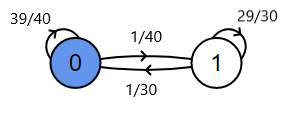

In [105]:
Image("markov_chain.png")

**Estado 0**: no se procesan solicitudes

**Estado 1**: se procesa una solicitud

## Punto a)

La matriz de transicion es de 2x2 ya que tenemos unicamente dos estados. En el la posicion 1 - 1 va la probabilidad de pasar del estado 0 al mismo estado. En 1 - 2 la probabilidad de pasar del estado 0 al estado 1.
Lo mismo va para la segunda fila, pero en funcion del estado 1.

In [84]:
matriz_transicion = np.array([[39/40, 1/40], [1/30, 29/30]])

## Punto b)

In [85]:
# Constantes
SEGUNDOS = 1000
INTERVALO = 0.01
ESTADOS = ['0', '1']

# n el numero de intervalos de tiempo. 1000 s / 0.01 s = 100000 intervalos
n = int(SEGUNDOS / INTERVALO)

# La distribucion de probabilidades acumuladas facilita la simulacion.
acumulada = np.array([[0.975, 1], [1/30, 1]])

In [86]:
resultado_estados = np.zeros(n)

# Estado (inicial) del sistema
estado = np.array([1, 0])

for i in range(n):
    d = estado.dot(acumulada)
    rand = np.random.rand()
    
    # Determinar a que estado cambia, y guardar el resultado.
    j = 0
    while (rand > d[j]):
        j = j + 1
    resultado_estados[i] = j
    
    # Cambiar el estado de la maquina para el siguiente intervalo.
    estado = np.array([0,0])
    estado[j] = 1

## Punto c)

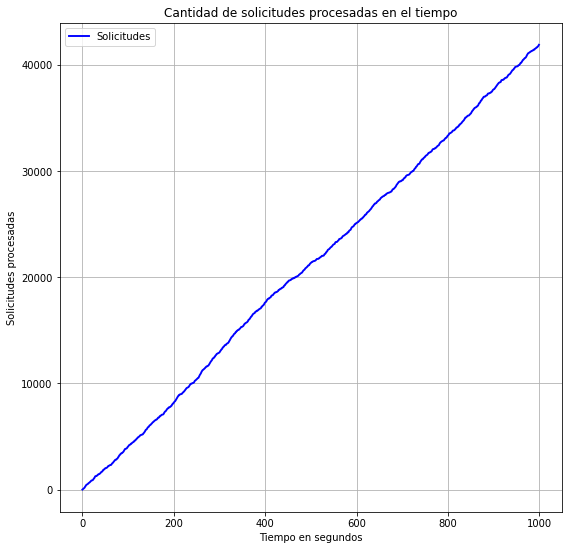

In [87]:
# collections.Counter cuenta los diferentes valores dentro de un arreglo y los guarda en diccionario.
resultados_categorizados = Counter(resultado_estados)
solicitudes_cada_100 = [] # 100 veces 10 milisegundos es 1 segundo, asi puedo graficar en funcion de de 1000 segundos

for i in range(len(resultado_estados)):
    if i != 0:
        resultado_estados[i] = resultado_estados[i] + resultado_estados[i-1] # Resultados acumulados.
    if i % 100 == 0:
        solicitudes_cada_100.append(resultado_estados[i])
        
plt.subplots(figsize = (9,9))
plt.title('Cantidad de solicitudes procesadas en el tiempo')
p = plt.plot(range(len(solicitudes_cada_100)), solicitudes_cada_100, color = 'blue', linewidth = 1.9, label = "Solicitudes")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Solicitudes procesadas")
plt.legend()
plt.grid()
plt.show()

## Punto d)

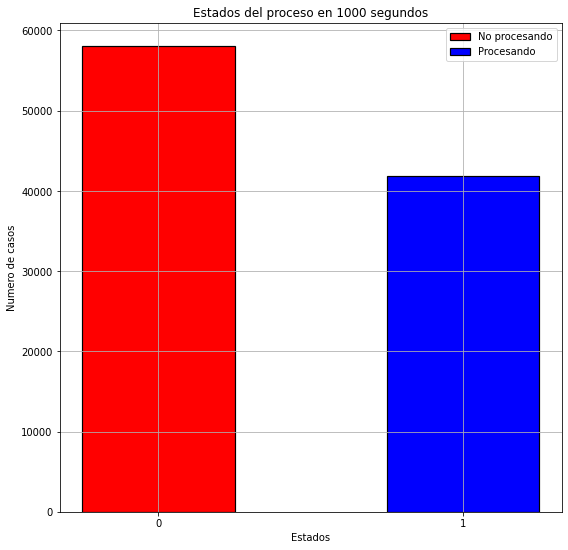

In [88]:
plt.subplots(figsize=(9,9))
plt.title('Estados del proceso en 1000 segundos')
p = plt.bar(ESTADOS, resultados_categorizados.values(), width = 0.5, color = ['red', 'blue'], linewidth = 1.2, edgecolor = 'black')
plt.ylabel('Numero de casos')
plt.xlabel('Estados')
plt.legend((p[0], p[1]), ('No procesando', 'Procesando'))
plt.grid()
plt.show()

## Punto e)

In [89]:
# Siendo n el numero de intervalos de tiempo, 
intervalos_sin_procesar = resultados_categorizados[0]
tiempo_sin_procesar = intervalos_sin_procesar/n
print("El porcentaje de tiempo sin procesar solicitudes es: {} %".format(tiempo_sin_procesar * 100))

El porcentaje de tiempo sin procesar solicitudes es: 58.083 %


# Ejercicio 3


In [90]:
import numpy as np
from numpy.random import RandomState
import scipy.stats as ss
import matplotlib.pyplot as plt

a) Determinar la matriz de transición de estados explicando cómo se obtiene la misma.

La matriz de transiciones tendra en la posicion $M_{i,j}$ la probabilidad de que la cantidad de usuarios se modifique de $i$ a $j$ en un minuto. Utilizamos entonces la fórmula incluida en el enunciado para calcular $P (i \rightarrow j)$ en cada posición de la matriz. En primer lugar calculamos las transiciones relacionadas a la distribución binomial, y luego utilizamos las mismas para encontrar las probabilidades de la diagonal inferior de la matriz.

In [91]:
n = 50
p = 0.7
matriz_transiciones = np.zeros((n+1, n+1))

for i in range(n + 1):
    for j in range(n + 1 - i):
        matriz_transiciones[i][j] = ss.binom.pmf(j-i, n, p)

sumatoria = np.sum(matriz_transiciones, axis=1)

for i in range(n):
    for j in range(i+1):
        matriz_transiciones[i+1][j] = (1 - sumatoria[i+1]) / (i+1)
        

Corroboramos que cada fila sume 1:

In [92]:
np.sum(matriz_transiciones, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

b) Utilizando Matlab, Octave o Python simular una posible evolución del sistema a lo largo de 100 observaciones
graficando cómo se modifica la cantidad de clientes conectados en cada momento.

Simulamos 100 observaciones, generando muestras aleatorias de distribuciones no uniformes conformes a la respectiva fila de la matriz de transiciones.

In [93]:
def simular_sistema(cantidad_transiciones, semilla):

    random_state = RandomState(semilla)
    estados = np.zeros(cantidad_transiciones + 1)

    for i in range(cantidad_transiciones):
        estados[i+1] = random_state.choice(51,1, p=matriz_transiciones[int(estados[i])])
    return estados    

In [94]:
estados = simular_sistema(100, 5)

Text(0.5, 1.0, 'Simulacion de una evolucion de la cantidad de clientes en el banco')

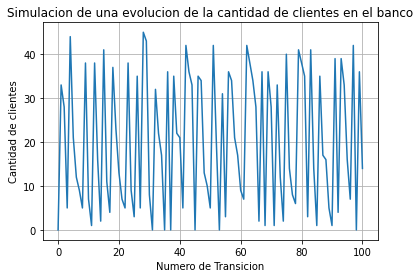

In [95]:
x = np.arange(101)
plt.plot(x, estados)
plt.xlabel('Numero de Transicion')
plt.ylabel('Cantidad de clientes')
plt.grid()
plt.title('Simulacion de una evolucion de la cantidad de clientes en el banco')

c) Simulando 100.000 observaciones realizar un histograma mostrando cuantas veces el sistema estuvo en cada
estado.

Text(0.5, 1.0, 'Histograma de la frecuencia de la cantidad de clientes conectados al banco en simultaneo')

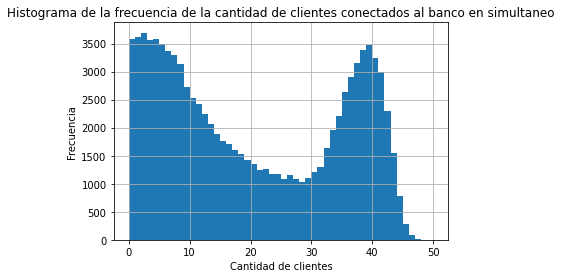

In [96]:
estados = simular_sistema(100000, 2)
plt.hist(estados, bins=np.arange(n+1))
plt.xlabel('Cantidad de clientes')
plt.ylabel('Frecuencia')
plt.grid()
plt.title('Histograma de la frecuencia de la cantidad de clientes conectados al banco en simultaneo')

In [97]:
print("El porcentaje de tiempo que el home banking no tuvo clientes conectados fue del {:.3f} %".format(np.sum(np.asarray(estados == 0) * 100 / 100000)))

El porcentaje de tiempo que el home banking no tuvo clientes conectados fue del 3.589 %


In [98]:
print("El porcentaje de tiempo que el home banking tuvo mas de 40 clientes conectados fue del {:.3f} %".format(np.sum(np.asarray(estados > 40) * 100 / 100000)))

El porcentaje de tiempo que el home banking tuvo mas de 40 clientes conectados fue del 7.995 %


Por lo tanto, se puede recomendar la migración. 

#Ejercicio 4

Se desea simular la evolución de una epidemia utilizando el modelo S.I.R.
Se conoce que inicialmente el 3% de la población se encuentra infectada, toda la población es susceptible de
contagiarse, la tasa de transmisión β=0,27, y la tasa de recuperación γ = 0,043


Se pide:
- Implementar el modelo SIR correspondiente.
- Graficar las curvas de porcentajes de personas sanas, infectadas y recuperadas, de forma que se vea la evolución
de la epidemia.
- Sabiendo que el sistema de salud puede asistir cómo máximo sólo al 30% de la población a la vez, determine la
duración total de la epidemia si se quiere que el pico máximo de infectados no supere las capacidades de
asistencia médica. ¿Qué parámetros modifica? ¿Por qué?


Pruebe con 3 distintos juegos de parámetros del modelo y comente los comportamientos explorados.

##Modelo SIR


##Variables 

S(t): Susceptibles

I(t): Infectados

R(t): Recuperados 

Infectados iniciales: 3%

Susceptibles iniciales: 97% (toda la población que no esta ya infectada)

Recuperados iniciales: 0%

## Ecuaciones Diferenciales del Modelo


$ \frac{\mathrm dS} {\mathrm dt} = -\beta SI\ $

$ \frac{\mathrm dI} {\mathrm dt} = \beta SI-\gamma I\ $

$ \frac{\mathrm dR} {\mathrm dt} = \gamma I\ $


##Parametros

$ \beta $ : tasa de transmisión

$ \gamma $: tasa de recuperación

$ \frac{1} {\gamma} $: período medio de recuperación 

### Valores

$ \gamma = 0.043 $

$ \beta = 0.27 $

Entonces el periodo medio de recuperacion es de : $ \frac{1} {\gamma} =  \frac{1} {0.043} = 23.25$ dias

##Implementacion del modelo del SIR utilizando RK4

In [99]:
# RK4
import numpy as np

def modelo_SIR(x, beta, gamma, n):
  #x(0) = S, x(1) = I,  x(2) = R
  xp = np.zeros((3, 1))
  xp[0] = -beta*x[0][n-1]*x[1][n-1]
  xp[1] = beta*x[0][n-1]*x[1][n-1] - gamma*x[1][n-1]
  xp[2] = gamma*x[1][n-1]

  return xp


def RK4(  x0, h, T , beta, gamma):
  t0 = T[0]
  tf = T[len(T)-1]

  N = round((tf-t0)/h) #Numero de pasos total
  t = np.zeros(N)

  x = np.zeros((3, N))

  t[0] = t0

  x=np.array(np.zeros((3, N)))
  x = np.delete(x, 0, axis=1)
  x = np.insert(x,0,x0,axis=1)
  
  for n in range(1, N):

    k1 = h* modelo_SIR( x, beta, gamma, n)
    k2 = h* modelo_SIR( x + 0.5*k1,beta, gamma, n)
    k3 = h* modelo_SIR( x + 0.5*k2, beta, gamma,n)
    k4 = h* modelo_SIR( x + k3, beta, gamma,n)

    k=(1/6)*(k1 + 2*k2 + 2*k3 + k4)

    for i in range(0, 3):
      x[i][n]=x[i][n-1]+k[i]

    t[n] = t[n-1] + h

  return x



##Simulacion de la epidemia

In [100]:
import matplotlib.pyplot as plt

def graficar_curvas(I,S,R,M):
  fig, ax = plt.subplots(figsize = (10,6))
  ax.plot(M, color = 'black', label = 'Capacidad Sistema Medico')
  ax.plot(S, color = 'blue', label = 'Susceptibles')
  ax.plot(I, color = 'red', label = 'Infectados')
  ax.plot(R, color = 'green', label = 'Recuperados')
  plt.title("Evolucion de Enfermedad")
  ax.set_xlabel('Dias')
  ax.set_ylabel('Poblacion')
  plt.legend()
  plt.grid()
  plt.show()


def duracion_epidemia(I,N):
  indice=-1
  i=0
  while( round(I[i], 5) != 0):
    i+=1
    if( i==(N-1)):break
  indice=i

  return indice

Grafico Evolución de Epidemia con parametros del Ejercicio 


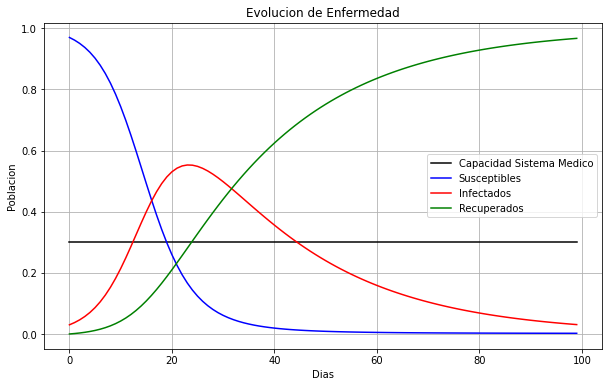

Máximo de infectados 0.55282
Máximo de infectados para que no sature el sistema medico es: 0.3
La poblacion final se conserva


In [101]:
# Simulacion de un modelo de epidemias SIR
import numpy as np

# Condiciones iniciales
S0=1-0.03
I0=0.03
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 1 #avanzamos de a 1 dia
tiempo=(0,100)
N=tiempo[-1]
Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

# Grafico Evolución de Epidemia con parametros del Ejercicio 
beta= 0.27
gamma = 0.043

Resultados = RK4(x , h, tiempo,beta,gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("Grafico Evolución de Epidemia con parametros del Ejercicio ")

graficar_curvas(I,S,R,M)

#amplitud del pico
max_infect=max(I)
print("Máximo de infectados",round(max_infect,5))
print("Máximo de infectados para que no sature el sistema medico es:", 0.3*T0)

poblacion_final=S[N-1]+R[N-1]+I[N-1]
if (round(poblacion_final) == T0):
  print("La poblacion final se conserva")
else:
    print("La poblacion final es de",poblacion_final)


Una forma de dismunuir la curva de infectados, seria bajando el nivel de contacto $\beta$

Esto se debe a que al haber menor numero de contacto en la población, esta se infecta a un paso mucho menor, lo cual logra el objetivo de no saturar la capacidad del sistema medico.


Otra forma de disminuir la curva de infectados, sería aumentando la tasa de recuperacion $\gamma $

Así, al durar ser mayor la tasa de recuperacion, el periodo promedio de duracion de la enfermedad $\frac{1}{\gamma}$ disminuye, por lo tanto es menor el periodo de tiempo en el cual una persona infectada puede contagiar a otros

Grafico Evolución de Epidemia modificando la tasa de contacto 


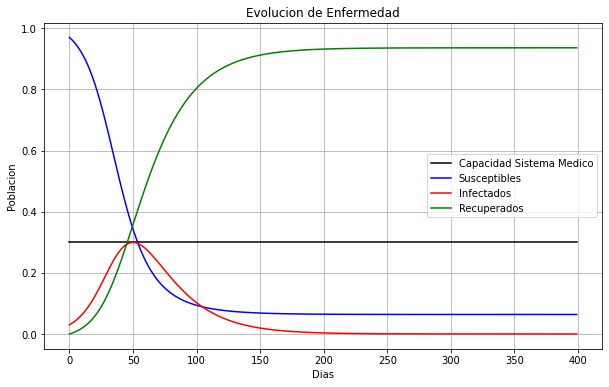

Máximo de infectados 0.29939
Máximo de infectados para que no sature el sistema medico es: 0.3
La epidemia durara 387 días 



In [102]:
import numpy as np
# Condiciones iniciales
S0=1-0.03
I0=0.03
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 1
tiempo=(0,400)
N=tiempo[-1]

Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

# Grafico Evolución de Epidemia modificando beta 
beta = 0.125
gamma = 0.043

Resultados = RK4(x , h,tiempo ,beta,gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

#print (I)

print("Grafico Evolución de Epidemia modificando la tasa de contacto ")

graficar_curvas(I,S,R,M)

#amplitud del pico
max_infect=max(I)
print("Máximo de infectados",round(max_infect,5))
print("Máximo de infectados para que no sature el sistema medico es:", 0.3*T0)


duracion=duracion_epidemia(I,N)
print("La epidemia durara", duracion, "días \n")



Grafico Evolución de Epidemia modificando la tasa de recuperación 


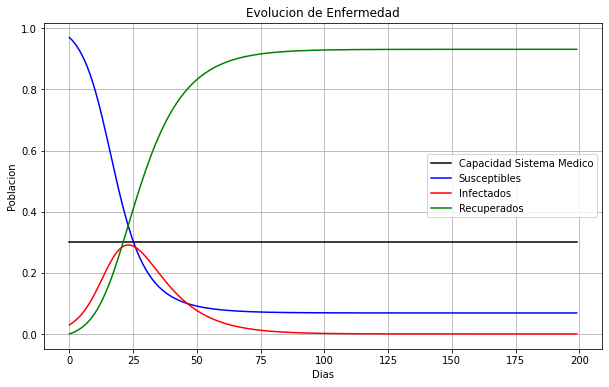

Máximo de infectados 0.29132
Máximo de infectados para que no sature el sistema medico es: 0.3
La epidemia durara 178 días


In [103]:
import numpy as np
# Condiciones iniciales
S0=1-0.03
I0=0.03
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 1
tiempo=(0,200)
N= tiempo[-1]

Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

# Grafico Evolución de Epidemia modificando gamma 
beta = 0.27
gamma = 0.095


Resultados = RK4(x , h, tiempo,beta,gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

#print (I)

print("Grafico Evolución de Epidemia modificando la tasa de recuperación ")

graficar_curvas(I,S,R,M)

#amplitud del pico
max_infect=max(I)
print("Máximo de infectados",round(max_infect,5))
print("Máximo de infectados para que no sature el sistema medico es:", 0.3*T0)


duracion=duracion_epidemia(I,N)
print("La epidemia durara", duracion, "días")

Con un valor de beta de $\beta$ = 0.125 el sistema medico no colapsa y la epidemia tendria una duracion de ---387---

Mientras que con un valor de $\gamma$ =0.095 el sistema medico no colapsa y la epidemia tendria una duracion de ---178--- dias, mucho menor que la anterior

#Graficos Con Nuevos Parametros


 CASO 1 



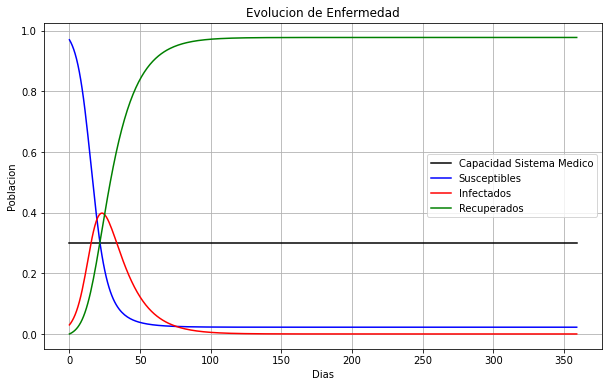

La epidemia durara 209 días
Máximo de infectados 0.39866

 CASO 2 



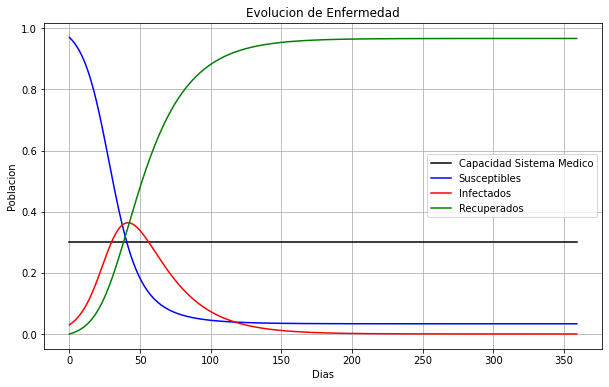

La epidemia durara 354 días
Máximo de infectados 0.36382

 CASO 3 



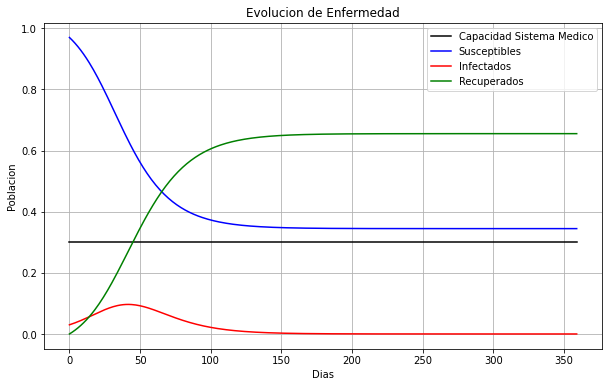

La epidemia durara 296 días
Máximo de infectados 0.09666


In [104]:
# Simulacion de un modelo de epidemias SIR
import numpy as np

S0=1-0.03
I0=0.03
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 1
tiempo=(0,360)
N = tiempo[-1]

Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

#------------------------------------------------------------

# Caso 1 

beta = 0.27
gamma = 0.07

Resultados = RK4(x , h, tiempo,beta, gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("\n CASO 1 \n")

graficar_curvas(I,S,R,M)
duracion=duracion_epidemia(I,N)
print("La epidemia durara", duracion, "días")

max_infect=max(I)
print("Máximo de infectados",round(max_infect,5))


# Caso 2

beta = 0.15
gamma = 0.043

Resultados = RK4(x , h, tiempo,beta, gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("\n CASO 2 \n")

graficar_curvas(I,S,R,M)
duracion=duracion_epidemia(I,N)
print("La epidemia durara", duracion, "días")
max_infect=max(I)
print("Máximo de infectados",round(max_infect,5))

# Caso 3 
bete = 0.125
gamma= 0.095

Resultados = RK4(x , h, tiempo ,beta,gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("\n CASO 3 \n")

graficar_curvas(I,S,R,M)
duracion=duracion_epidemia(I,N)
print("La epidemia durara", duracion, "días")
max_infect=max(I)
print("Máximo de infectados",round(max_infect,5))

# Conclución
##Analisis de cada uno de los casos

* En el caso 1 manteniendo constante el valor de beta en 0.27 y aumentando el valor de gamma de 0.043 a 0.06 se puede observar que disminuye el pico de la curva de infectados de 0.55282 a 0.39866 y la duracion de la epidemia seria de 209 dias en vez de 387 dias

* En el caso 2 manteniendo constante el valor de gamma en 0.043 y disminuyendo el valor de beta de 0.27 a 0.15 el pico de la curva de infectados disminuye a 0.36382 y la duracion de la epidemia es de 354 dias

* En el caso 3 modifico ambos parametros al valor en el cual no se saturaba el sistema medico en los primeros graficos, y disminuye significativamente el pico de la curva de infectados a 0.09666 , y se obtiene una duracion de la epidemia a 296 dias


Luego de observar todos los casos, podemos concluir que la forma más eficiente de reducir el pico de la curva de infectados es aumentando el valor de $ \gamma$, y si se llega hasta el valor de 0.095 no solo no se satura el sistema medico, sino que a su vez se obtiene una duracion de epidemia de 178 dias. 

Con este valor de $ \gamma$, el período de recuperación promedio es de aproximadamente 11 dias, lo que no es un valor muy diferente a la realidad que estamos atravesando